In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Đọc file dữ liệu
df = pd.read_csv('Palladium.csv')
df.head(5)

,Open,Close,High,Low,Date
0,1067.5,1067.5,1067.5,1067.5,1/1/2018
1,1066.5,1096.0,1099.0,1066.0,1/2/2018
2,1095.5,1088.0,1097.0,1084.0,1/3/2018
3,1086.5,1102.5,1108.5,1083.5,1/4/2018
4,1100.0,1091.5,1103.0,1086.5,1/5/2018


In [3]:
df.describe()

,Open,Close,High,Low
count,2110.000000,2110.000000,2110.000000,2110.000000
mean,1719.885199,1723.637678,1746.066469,1696.220142
std,569.588734,563.748196,579.079533,559.238724
min,0.000000,846.000000,0.000000,0.000000
25%,1216.375000,1219.250000,1230.250000,1199.500000
50%,1736.750000,1740.000000,1763.500000,1702.250000
75%,2181.500000,2180.000000,2214.500000,2144.375000
max,3205.000000,3178.000000,3435.500000,3008.000000


In [4]:
df.loc[0,:]

Open       1067.5
Close      1067.5
High       1067.5
Low        1067.5
Date     1/1/2018
Name: 0, dtype: object

In [5]:
# Đưa về kiểu date và đánh index
df['Date'] = pd.to_datetime(df.Date)
df

,Open,Close,High,Low,Date
0,1067.5,1067.5,1067.5,1067.5,2018-01-01
1,1066.5,1096.0,1099.0,1066.0,2018-01-02
2,1095.5,1088.0,1097.0,1084.0,2018-01-03
3,1086.5,1102.5,1108.5,1083.5,2018-01-04
4,1100.0,1091.5,1103.0,1086.5,2018-01-05
...,...,...,...,...,...
2105,995.5,975.5,997.0,969.5,2024-05-28
2106,982.5,968.0,983.0,946.5,2024-05-29
2107,957.0,950.5,962.0,932.5,2024-05-30
2108,949.5,914.5,956.0,903.5,2024-05-31


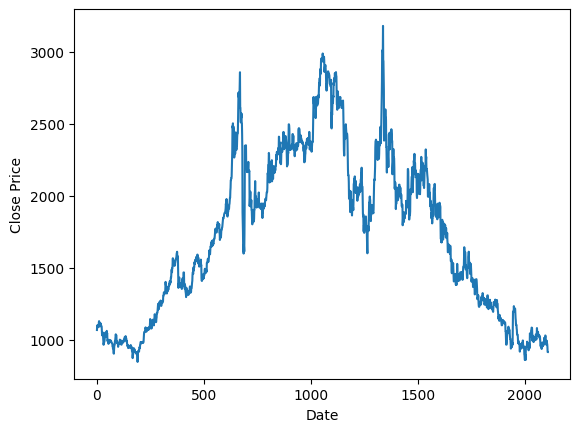

In [6]:
# Vẽ biểu đồ chuỗi thời gian
plt.plot(df.index, df["Close"])
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

In [7]:
df = df[['Close']]
df = df.reset_index(drop=True)
df.head(5)

,Close
0,1067.5
1,1096.0
2,1088.0
3,1102.5
4,1091.5


In [8]:
#Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [9]:
# Chia train test theo tỉ lệ 6:4
# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_size = int(0.7 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [10]:
train_data

array([[0.09498285],
       [0.10720412],
       [0.10377358],
       ...,
       [0.55102916],
       [0.57975986],
       [0.5207976 ]])

In [11]:
# Chuẩn bị dữ liệu cho x,y
def create_dataset(dataset, lags=1):
    X, Y = [], []
    for i in range(len(dataset)-lags-1):
        a = dataset[i:(i+lags), 0]
        X.append(a)
        Y.append(dataset[i + lags, 0])
    return np.array(X), np.array(Y)

In [12]:
#Thiết lập tham số cho model
lags = 30 
X_train, y_train = create_dataset(train_data, lags)
X_test, y_test = create_dataset(test_data, lags)

In [13]:
X_test

array([[0.50493139, 0.52465695, 0.54995712, ..., 0.53409091, 0.53237564,
        0.50042882],
       [0.52465695, 0.54995712, 0.54995712, ..., 0.53237564, 0.50042882,
        0.50664666],
       [0.54995712, 0.54995712, 0.54995712, ..., 0.50042882, 0.50664666,
        0.50664666],
       ...,
       [0.04674099, 0.05488851, 0.04459691, ..., 0.05231561, 0.06303602,
        0.05553173],
       [0.05488851, 0.04459691, 0.04266724, ..., 0.06303602, 0.05553173,
        0.05231561],
       [0.04459691, 0.04266724, 0.03859348, ..., 0.05553173, 0.05231561,
        0.04481132]])

In [14]:
#In thông tin kích thước của dữ liệu
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1446, 30) (1446,)
(602, 30) (602,)


In [15]:
#Huấn luyện model SVR
model = SVR(kernel='linear', C=10, gamma=0.01)
model.fit(X_train, y_train)

SVR(C=10, gamma=0.01, kernel='linear')

In [16]:
#Dự báo dự liệu dựa trên tập test
y_pred = model.predict(X_test)
#y_pred = scaler.inverse_transform(y_pred.reshape(-1,1)).flatten()

In [17]:
# 10. Đánh giá độ chính xác thuật toán bằng MAPE, MSE và RMSE

#MAPE
test_mape = mean_absolute_percentage_error(y_test, y_pred)
#MSE
test_mse = mean_squared_error(y_test, y_pred)
#RMSE
test_rmse = np.sqrt(test_mse)

print('Testing MAPE:', test_mape)
print('Testing MSE:', test_mse)
print('Testing RMSE:', test_rmse)

Testing MAPE: 0.5724197094384609
Testing MSE: 0.0029730747155152157
Testing RMSE: 0.05452590866290277


In [18]:
y_pred = scaler.inverse_transform(y_pred.reshape(-1,1)).flatten()
y_pred

array([2041.49254808, 2029.37797611, 2033.8703186 , 2054.1567687 ,
       2073.38538768, 2032.586659  , 2086.40346108, 2200.36541148,
       2263.38719382, 2271.68895451, 2243.52737295, 2295.61791238,
       2116.64947012, 2103.93915913, 2158.79564546, 2121.14346404,
       2146.3609892 , 2203.56758366, 2227.29635903, 2142.95933027,
       2196.36802524, 2115.66645582, 2054.57455413, 2073.80604464,
       2056.41006161, 2068.48248639, 2114.70546057, 2175.04217556,
       2135.64314651, 2157.21101033, 2194.7821562 , 2206.46733592,
       2301.81697409, 2262.23908475, 2241.85888952, 2176.99637665,
       2151.15698809, 2161.18329757, 2145.03280528, 2180.59284024,
       2146.7985414 , 2147.69534812, 2035.52827194, 1962.17099772,
       1977.06999878, 1957.93329633, 2003.87161625, 2018.26537292,
       2107.53604921, 2027.89012435, 1973.50605772, 2008.85477933,
       1951.11676596, 1954.5837471 , 2004.20890869, 2015.99665281,
       1936.56898611, 1926.99004206, 1954.13651932, 1925.05432

In [19]:
# 13. Dự báo 30 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
lags=30
i=0
while(i<30):
    if(len(temp_input)>30):
        x_input=np.array(temp_input[-lags:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat)  
        temp_input=temp_input[1:]
        lst_output.append(yhat)  
        i=i+1
    else:
        x_input = x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  
        print(yhat)
        temp_input.append(yhat)
        print(len(temp_input))
        lst_output.append(yhat)
        i=i+1


0 day input [0.03859348 0.04459691 0.04459691 0.05789022 0.05638937 0.04652659
 0.05295883 0.057247   0.057247   0.057247   0.05060034 0.05767581
 0.07161235 0.06453688 0.07054031 0.07054031 0.07054031 0.07868782
 0.07825901 0.06689537 0.05403087 0.05167238 0.05167238 0.05231561
 0.06303602 0.05553173 0.05231561 0.04481132 0.02937393 0.02937393]
0 day output 0.09309757364748322
1 day input [0.04459691 0.04459691 0.05789022 0.05638937 0.04652659 0.05295883
 0.057247   0.057247   0.057247   0.05060034 0.05767581 0.07161235
 0.06453688 0.07054031 0.07054031 0.07054031 0.07868782 0.07825901
 0.06689537 0.05403087 0.05167238 0.05167238 0.05231561 0.06303602
 0.05553173 0.05231561 0.04481132 0.02937393 0.02937393 0.09309757]
1 day output 0.14429076097464882
2 day input [0.04459691 0.05789022 0.05638937 0.04652659 0.05295883 0.057247
 0.057247   0.057247   0.05060034 0.05767581 0.07161235 0.06453688
 0.07054031 0.07054031 0.07054031 0.07868782 0.07825901 0.06689537
 0.05403087 0.05167238 0.05

In [20]:
# 13. Dự báo 60 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output_60=[]
lags=30
i=0
while(i<60):
    if(len(temp_input)>30):
        x_input=np.array(temp_input[-lags:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat)  # Append the scalar value directly
        temp_input=temp_input[1:]
        lst_output_60.append(yhat)  # Append the scalar value directly
        i=i+1
    else:
        x_input = x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print(yhat)
        temp_input.append(yhat)
        print(len(temp_input))
        lst_output_60.append(yhat)
        i=i+1


0 day input [0.03859348 0.04459691 0.04459691 0.05789022 0.05638937 0.04652659
 0.05295883 0.057247   0.057247   0.057247   0.05060034 0.05767581
 0.07161235 0.06453688 0.07054031 0.07054031 0.07054031 0.07868782
 0.07825901 0.06689537 0.05403087 0.05167238 0.05167238 0.05231561
 0.06303602 0.05553173 0.05231561 0.04481132 0.02937393 0.02937393]
0 day output 0.09309757364748322
1 day input [0.04459691 0.04459691 0.05789022 0.05638937 0.04652659 0.05295883
 0.057247   0.057247   0.057247   0.05060034 0.05767581 0.07161235
 0.06453688 0.07054031 0.07054031 0.07054031 0.07868782 0.07825901
 0.06689537 0.05403087 0.05167238 0.05167238 0.05231561 0.06303602
 0.05553173 0.05231561 0.04481132 0.02937393 0.02937393 0.09309757]
1 day output 0.14429076097464882
2 day input [0.04459691 0.05789022 0.05638937 0.04652659 0.05295883 0.057247
 0.057247   0.057247   0.05060034 0.05767581 0.07161235 0.06453688
 0.07054031 0.07054031 0.07054031 0.07868782 0.07825901 0.06689537
 0.05403087 0.05167238 0.05

In [21]:
# 13. Dự báo 90 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output_90=[]
lags=30
i=0
while(i<90):
    if(len(temp_input)>30):
        x_input=np.array(temp_input[-lags:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat)  # Append the scalar value directly
        temp_input=temp_input[1:]
        lst_output_90.append(yhat)  # Append the scalar value directly
        i=i+1
    else:
        x_input = x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print(yhat)
        temp_input.append(yhat)
        print(len(temp_input))
        lst_output_90.append(yhat)
        i=i+1


0 day input [0.03859348 0.04459691 0.04459691 0.05789022 0.05638937 0.04652659
 0.05295883 0.057247   0.057247   0.057247   0.05060034 0.05767581
 0.07161235 0.06453688 0.07054031 0.07054031 0.07054031 0.07868782
 0.07825901 0.06689537 0.05403087 0.05167238 0.05167238 0.05231561
 0.06303602 0.05553173 0.05231561 0.04481132 0.02937393 0.02937393]
0 day output 0.09309757364748322
1 day input [0.04459691 0.04459691 0.05789022 0.05638937 0.04652659 0.05295883
 0.057247   0.057247   0.057247   0.05060034 0.05767581 0.07161235
 0.06453688 0.07054031 0.07054031 0.07054031 0.07868782 0.07825901
 0.06689537 0.05403087 0.05167238 0.05167238 0.05231561 0.06303602
 0.05553173 0.05231561 0.04481132 0.02937393 0.02937393 0.09309757]
1 day output 0.14429076097464882
2 day input [0.04459691 0.05789022 0.05638937 0.04652659 0.05295883 0.057247
 0.057247   0.057247   0.05060034 0.05767581 0.07161235 0.06453688
 0.07054031 0.07054031 0.07054031 0.07868782 0.07825901 0.06689537
 0.05403087 0.05167238 0.05

In [22]:
# Inverse transform the future predictions
lst_output = scaler.inverse_transform(np.array(lst_output).reshape(-1, 1)).flatten()
lst_output_60 = scaler.inverse_transform(np.array(lst_output_60).reshape(-1, 1)).flatten()
lst_output_90 = scaler.inverse_transform(np.array(lst_output_90).reshape(-1, 1)).flatten()

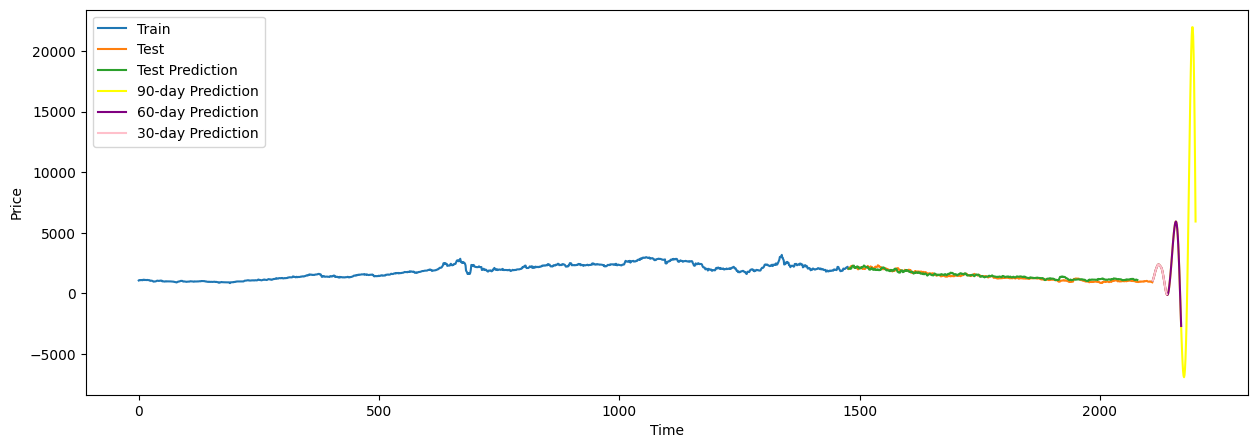

In [23]:
plt.figure(figsize=(15, 5))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, scaler.inverse_transform(train_data), label='Train')

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data), label='Test')

test_pred_index = pd.RangeIndex(start=train_size, stop=train_size+len(y_pred), step=1)
plt.plot(test_pred_index, y_pred, label='Test Prediction')

next_90days_pred_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+len(lst_output_90), step=1)
plt.plot(next_90days_pred_index, lst_output_90, color='yellow', label='90-day Prediction')

next_60days_pred_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+len(lst_output_60), step=1)
plt.plot(next_60days_pred_index, lst_output_60, color='purple', label='60-day Prediction')

next_30days_pred_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+len(lst_output), step=1)
plt.plot(next_30days_pred_index, lst_output, color='pink', label='30-day Prediction')

plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()